In the field of statistics, the assumption of normality is important because many statistical techniques perform calculations assuming that the data is normally distributed. The techniques that assume Gaussian or Gaussian-like distribution are listed below:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Techniques That Assume Normality</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">Hypothesis testing through t-test and z-test</td>
      </tr>
      <tr>
         <td class="text-center">Analysis of variance (ANOVA)</td>
      </tr>       
      <tr>
         <td class="text-center">Sequential Gaussian simulation in spatial analysis</td>
      </tr>
      <tr>
         <td class="text-center">Control limits in control chart</td>
      </tr>
   </tbody>
</table>

Unfortunately, many real-life data are not normal. Permeability distribution of rock samples is lognormal. Time required to repair a malfunctioning component follows exponential distribution, and reliability analysis for machine performance with respect to time follows Weibull distribution. What should you do if your data fails a normality test, or is not Gaussian-like? You have three options:

<ol class="rounded-list">
    <li><a href="#1.-Use-it-as-it-is-or-fit-non-normal-distribution">Use it as it is or fit non-normal distribution</a></li>
    <li><a href="#2.-Try-non-parametric-method">Try non-parametric method</a></li>
    <li><a href="#3.-Transform-the-data-into-normal-distribution">Transform the data into normal distribution</a></li>
</ol>

### 1. Use it as it is or fit non-normal distribution

It is possible that your data does not look normal when plotted, even though it follows normal distribution by nature, because there are too few samples. For example, test scores of college students follow a normal distribution. If you know for certain that your data is normally distributed by nature, then according to the Central Limit Theorem, your data will eventually become normal when you obtain a greater number of sample data.  This means that you can still use the famous standard deviation method to assign letter grades to students (*figure 1*), even if your students’ test scores do not look normally distributed. If you have more students to take your exam, the test score distribution will become more normal.

<div class="row give-margin-inline-plot">
    <div class="col-12"><img class="admonition-image" src="jupyter_images/test_score_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: assigning letter grades with standard deviation</p></div>
</div>

On the other hand, if you have plenty enough samples to represent the true population, you can fit different types of distributions to better describe your data. Different methods exist for different distributions and maybe you will be able to achieve your goal without using techniques that strictly require Gaussian distribution. 

The code snippet below fits three different distributions on the sample data: lognormal, normal, and Weibull distributions. Through a visual inspection, it can be observed that the sample data is the best represented by <u>lognormal distribution</u>. Once we know that the sample data follows lognormal distribution, we can move forward by employing techniques that assume lognormal distribution.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook

In [30]:
# sample data generation
np.random.seed(42)
data = sorted(stats.lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000))

# fit lognormal distribution
shape, loc, scale = stats.lognorm.fit(data, loc=0)
pdf_lognorm = stats.lognorm.pdf(data, shape, loc, scale)

# fit normal distribution
mean, std = stats.norm.fit(data, loc=0)
pdf_norm = stats.norm.pdf(data, mean, std)

# fit weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, loc=0)
pdf_weibull_min = stats.weibull_min.pdf(data, shape, loc, scale)

<IPython.core.display.Javascript object>


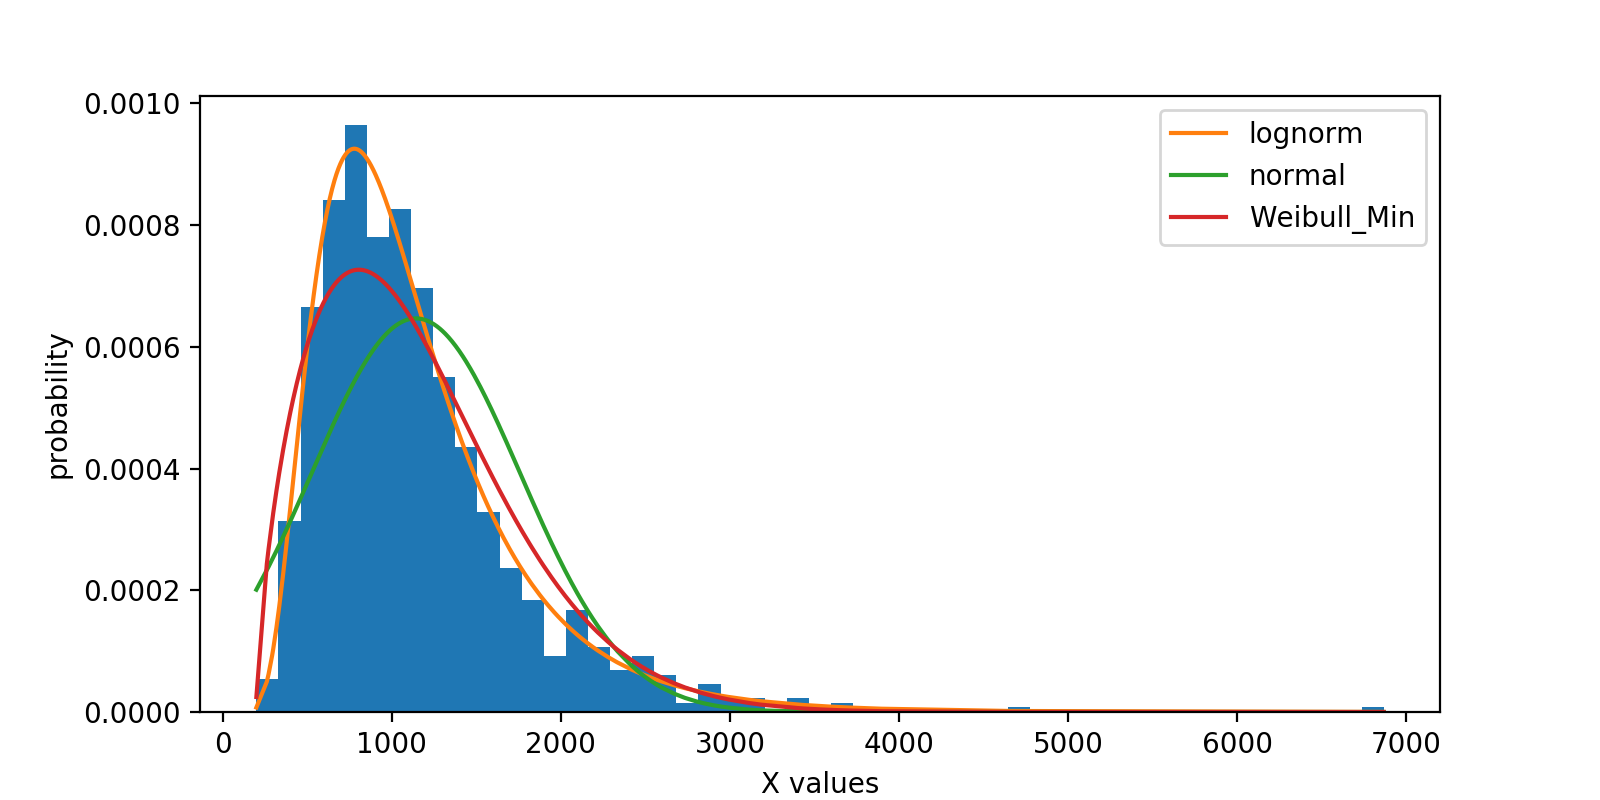

In [32]:
# visualize

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(data, bins='auto', density=True)
ax.plot(data, pdf_lognorm, label='lognorm')
ax.plot(data, pdf_norm, label='normal')
ax.plot(data, pdf_weibull_min, label='Weibull_Min')
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.legend();

<div class="alert alert-info">
    <h4>Notes</h4>
    <p>Visual inspection is one option to assess the performance of the fitted distributions. The other option is to use hypothesis testing with Q-Q plots to numerically assess the performance of the fitted distribution. For example, if you want to numerically assess how well your data matches Gaussian distribution, you can test your hypothesis through D'Agostino-Pearson normality test, Anderson-Darling Test, or Shapiro-Wilk Test. In this post, normality test through <code>scipy.stats.normaltest()</code> will be covered.</p>
</div>

### 2. Try non-parametric method

There are pros and cons for using non-parametric methods. The biggest pros is that it does not assume anything about the distribution. They are **distribution-free**. You do not need to know distribution shape, mean, standard devation, skewness, kurtosis, etc... All you need is just a set of sample data that is representative of a population. 

The fact that it does not assume anything about the distribution has another implication when you have small number of data - there's no need for Central Limit Theorem to be applied. Recall that the Central Limit Theorem states that the data will become more and more Gaussian-distributed as the number of samples increases. Techniques that assume normality of a distribution expect the sample data to follow Central Limit Theorem. Non-parametric methods improves the performance of statistical calculation when there are too few number of samples that the Central Limit Theorem can't be applied. However, it is important that those few samples are reasonably representative of the true population. If they are not, your result will be biased.

Non-parametric methods are geared toward hypothesis testing rather than estimation. Disadvantages of non-parametric methods include lack of power compared to more traditional approaches that require prior knowledge of a distribution. If you knew the distribution of your data with 100% certainty, there is no reason to use a non-parametric method.  Doing so would be a waste of perfectly good prior knowledge. 

Another disadvantage is that many non-parametric methods are computation intensive. For example, [Boostrapping](https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap) is a non-parametric alternative that requires numerical iterations to calculate confidence interval of statistics. On the other hand, if the assumption of normality holds valid for your data, you can directly compute the confidence interval by using a simple equation.

<div class="alert alert-info">
    <h4>Notes</h4>
    <p>Parametric methods are the type of methods that assume a certain shape of a distribution. For example, the following equation is used to calculate the confidence interval of a mean of a distribution:</p>
    <p><center style="margin-top: 20px">CI of mean = sample mean $\pm$ $($distribution score $\times$ Standard Error $)$</center></p>
    <p>The variable in the equation, <i>distribution score</i>, depends on the type of the distribution. If you do not know the distribution shape of your data, it is very difficult to obtain the value of the distribution score. On the other hand, non-parametric methods do not assume anything about a distribution. A non-parametric alternative to calculate confidencer interval of mean is to use <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap">Bootstrapping</a>.</p>
</div>

The following table lists non-parametric alternatives to techniques that assume normality of a distribution:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Techniques That Assume Normality</th>
         <th class="text-center">Non-Parametric Alternatives</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">Confidence Interval with z-test</td>
         <td class="text-center">Bootstrapping</td>
      </tr>
      <tr>
         <td class="text-center">T-test</td>
         <td class="text-center">Mann-Whitney test; Mood's median test; Kruskal-Wallis test</td>
      </tr>       
      <tr>
         <td class="text-center">ANOVA</td>
         <td class="text-center">Mood's median test; Kruskal-Willis test</td>
      </tr>
      <tr>
         <td class="text-center">Paired t-test</td>
         <td class="text-center">One-sample sign test</td>
      </tr>
      <tr>
         <td class="text-center">F-test; Bartlett's test</td>
         <td class="text-center">Levene's test</td>
      </tr>
      <tr>
         <td class="text-center">Individuals control chart</td>
         <td class="text-center">Run Chart</td>
      </tr>
   </tbody>
</table>

### 3. Transform the data into normal distribution

The data is actually normally distributed, but it might need transformation to reveal its normality. For example, lognormal distribution becomes normal distribution after taking a log on it. The two plots below are plotted using the same data, just visualized in different x-axis scale. Observe how lognormal distribution looks normal when log is taken on the x-axis.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook

In [15]:
# sample data generation
np.random.seed(42)
data = sorted(stats.lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000))

# fit lognormal distribution
shape, loc, scale = stats.lognorm.fit(data, loc=0)
pdf_lognorm = stats.lognorm.pdf(data, shape, loc, scale)

<IPython.core.display.Javascript object>


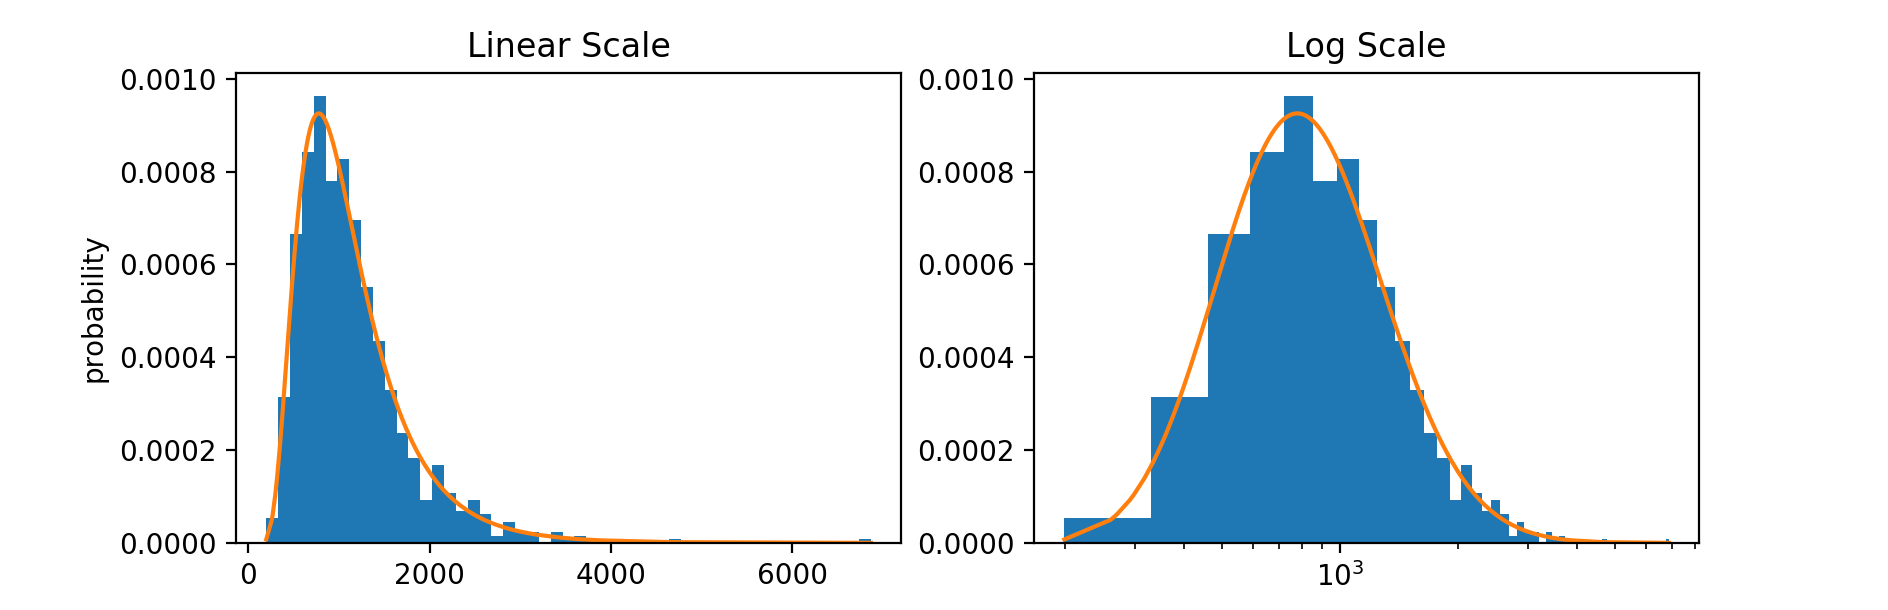

In [28]:
# visualize

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(data, bins='auto', density=True)
ax1.plot(data, pdf_lognorm)
ax1.set_ylabel('probability')
ax1.set_title('Linear Scale')

ax2.hist(data, bins='auto', density=True)
ax2.plot(data, pdf_lognorm)
ax2.set_xscale('log')
ax2.set_title('Log Scale');

Similar transformations can be done on the sample data to convert non-normal to normal distribution. Lognormal transformation is used convert rock permeability distributions to normal distribution, and square root transformation is used to analyze biological population growth, such bacterial colonies per petri dish. These types of transformations - rescaling the distribution by taking exponents or log - are called Power Transformations. **Box-Cox** transformation is the most popular technique within the family of power transformations.

# Box-Cox Transformation - Theory

> **Box-Cox Transformation** is a type of power transformation to convert non-normal data to normal data by raising the distribution to a power of lambda ($\lambda$). The algorithm can automatically decide the lambda ($\lambda$) parameter that best transforms the distribution into normal distribution.

Box-Cox transformation is a statistical technique known to have remedial effects on highly skewed data. Essentially it's just raising the distribution to a power of lambda ($\lambda$) to transform non-normal distribution into normal distribution. The lambda ($\lambda$) parameter for Box-Cox has a range of *-5 < $\lambda$ < 5*. If the lambda ($\lambda$) parameter is determined to be 2, then the distribution will be raised to a power of 2 — $Y^2$. The exception to this rule is when the lambda ($\lambda$) parameter is 0 - log will be taken to the distribution — log($Y$).

The below table shows how Box-Cox transformation raises the power of a distribution to different lambda ($\lambda$) values:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Lambda ($\lambda$)</th>
         <th class="text-center">Transformed Distribution ($Y^{'}$)</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">-2</td>
         <td class="text-center">$Y^{'} = \frac{1}{Y^2}$</td>
      </tr>
      <tr>
         <td class="text-center">-1</td>
         <td class="text-center">$Y^{'} = \frac{1}{Y^1}$</td>
      </tr>       
      <tr>
         <td class="text-center">-0.5</td>
         <td class="text-center">$Y^{'} = \frac{1}{sqrt(Y)}$</td>
      </tr>
      <tr>
         <td class="text-center">0</td>
         <td class="text-center">$Y^{'} = log(Y)$</td>
      </tr>
      <tr>
         <td class="text-center">0.5</td>
         <td class="text-center">$Y^{1} = sqrt(Y)$</td>
      </tr>
      <tr>
         <td class="text-center">1</td>
         <td class="text-center">$Y^{'} = Y$</td>
      </tr>
      <tr>
         <td class="text-center">2</td>
         <td class="text-center">$Y^{'} = Y^2$</td>
      </tr>       
   </tbody>
</table>

Although in the table lambda ($\lambda$) values of only *-2 < $\lambda$ < 2* were displayed, the actual algorithm has a range of *-5 < $\lambda$ < 5*. Also note that using a lambda ($\lambda$) value of 1 does not do anything to the distribution. If the Box-Cox algorithm spits out $\lambda = 1$, it probably means that your data is Gaussian-like enough to an extent that there is no need for transformation.

**All data to be positive and greater than 0 (Y > 0)**

Box-Cox transformation does not work if data is smaller than 0. This can easily be fixed by adding a constant ($C$) that will make all your data greater than zero. The transformation equation is then:

<p><center>$Y^{'} = (Y + C)^{\lambda}$</center></p>


In [87]:
import pandas as pd
import datetime
import re

file = 'sample_data/08c32c03-9d88-42a9-b8a1-f493a644b919_NRCEventReporting-Calls-2010.csv'

df = pd.read_csv(file)[['date_time_received', 'date_time_complete']]

In [120]:
def process_time(row):
    
    call_received = ' '.join(row['date_time_received'].split('T')).split('+')[0]
    call_ended    = ' '.join(row['date_time_complete'].split('T')).split('+')[0]
    
    call_received = datetime.datetime.strptime(call_received, '%Y-%m-%d %H:%M:%S')
    call_ended    = datetime.datetime.strptime(call_ended, '%Y-%m-%d %H:%M:%S')
    
    time_ellapsed = call_ended - call_received

    row['Time Ellapsed'] = str(time_ellapsed)
    row['Time Ellapsed (minutes)'] = round(time_ellapsed.total_seconds() / 60, 1)
    
    return row

parsed_df = df.iloc[11000: 12000, :].apply(process_time, axis=1)

In [105]:
parsed_df.head()

,date_time_received,date_time_complete,Time Ellapsed,Time Ellapsed (minutes)
0,2010-07-03T21:11:31+00:00,2010-07-03T21:19:57+00:00,0:08:26,8.4
1,2010-07-03T20:59:29+00:00,2010-07-03T21:16:22+00:00,0:16:53,16.9
2,2010-07-03T21:42:43+00:00,2010-07-03T21:53:07+00:00,0:10:24,10.4
3,2010-07-03T22:22:41+00:00,2010-07-03T22:34:07+00:00,0:11:26,11.4
4,2010-07-03T22:46:13+00:00,2010-07-03T22:50:24+00:00,0:04:11,4.2


<IPython.core.display.Javascript object>


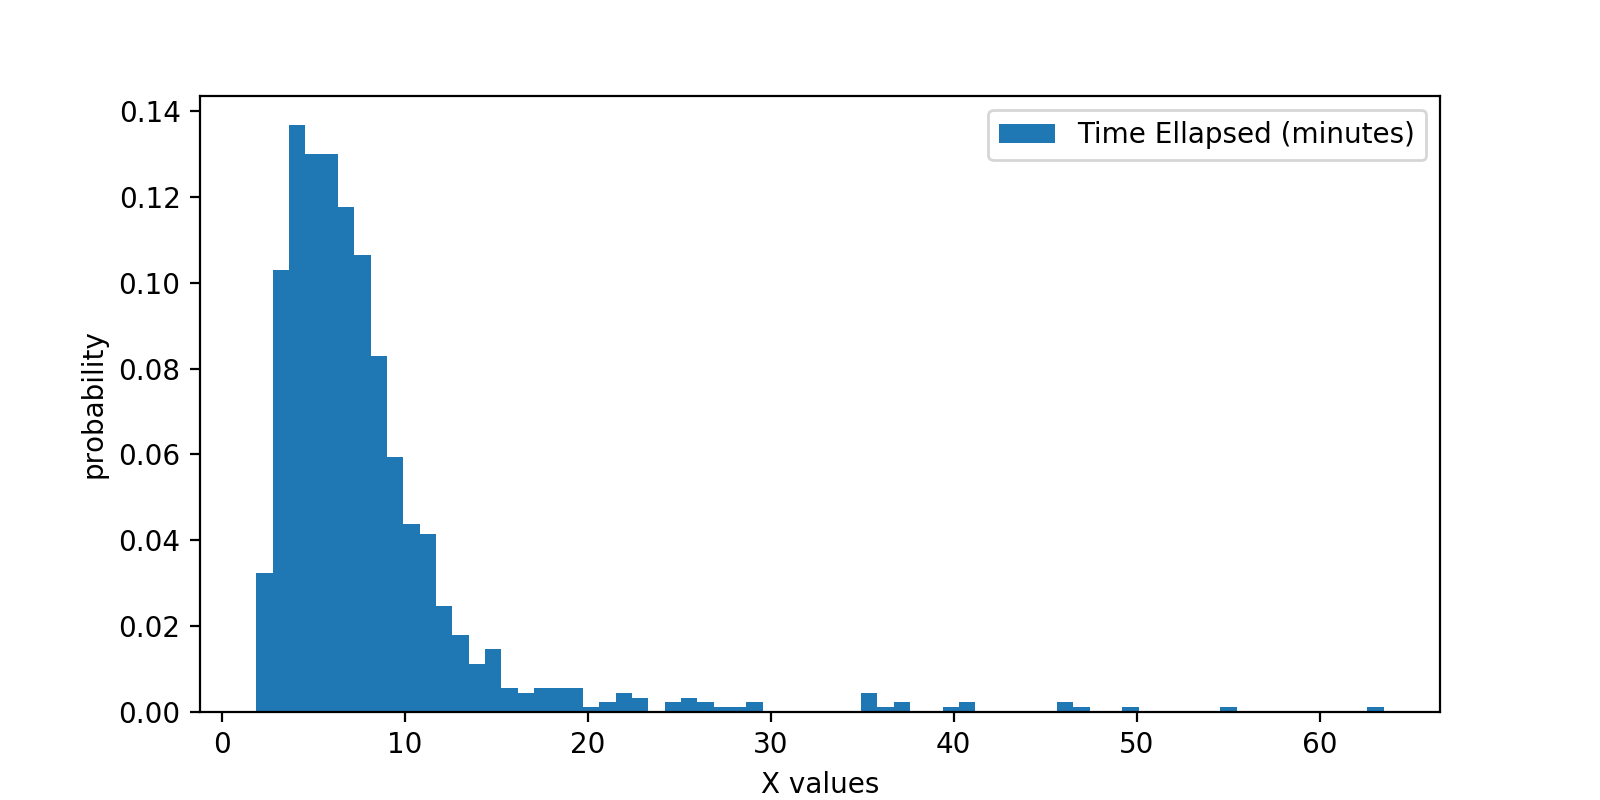

In [121]:
temp = parsed_df['Time Ellapsed (minutes)']

# visualize

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(temp, bins='auto', density=True)
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.legend();

<IPython.core.display.Javascript object>


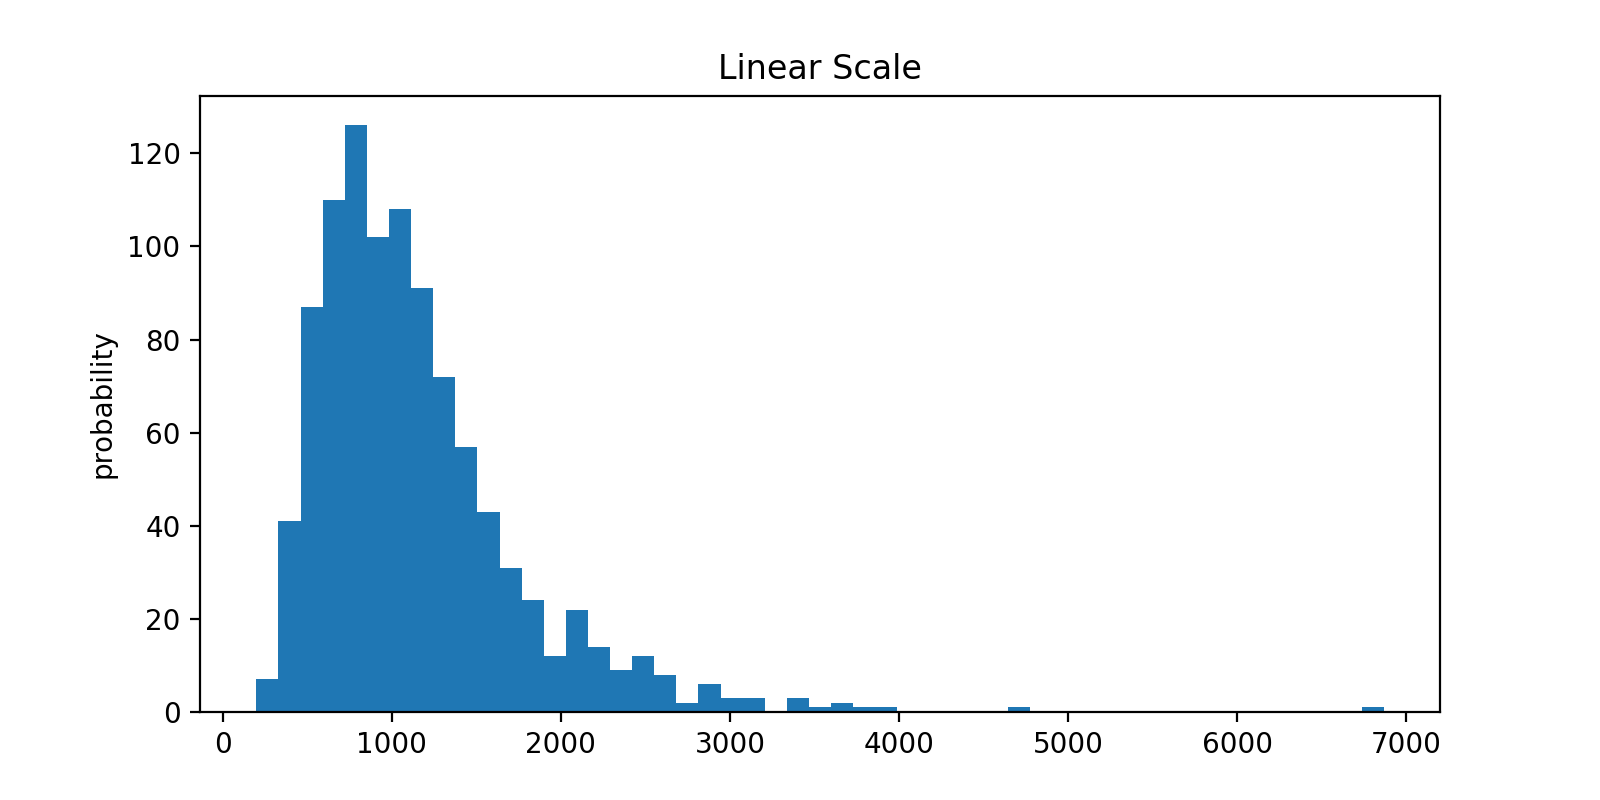

Text(0.5,1,'Linear Scale')

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(data, bins='auto')
ax.set_ylabel('probability')
ax.set_title('Linear Scale')

In [33]:
import urllib.request
data = urllib.request.urlopen('https://www.itl.nist.gov/div898/handbook/datasets/AUTO83B.DAT')


for line in data:
    ()